In [46]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
os.chdir(r'C:\Users\shubham\Desktop\case_study_python\13 Model Selection and Boosting')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [47]:
dataset = pd.read_csv('glass.csv')

In [48]:
dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


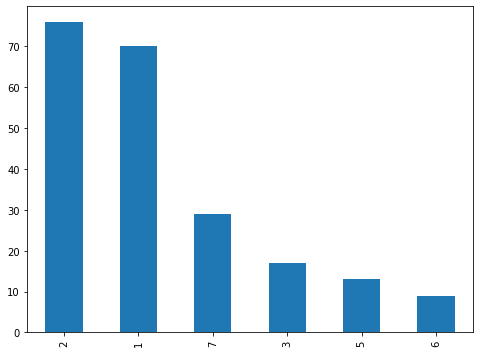

In [49]:
dataset['Type'].value_counts().plot(kind='bar', figsize=(8, 6))
 #plt.xlabel("Count of Tips Received", labelpad=14)
#plt.ylabel("Day of Week", labelpad=14)
#plt.title("Count of Tips by Day of Week", y=1.02)

In [50]:
dataset['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [52]:
x= dataset.loc[:,dataset.columns!='Type']
y= dataset.loc[:,dataset.columns=='Type']

In [32]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#x = scaler.fit_transform(x)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1)

In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [56]:
metrics.accuracy_score(y_test,y_pred)

0.7209302325581395

In [59]:
x.shape

(214, 9)

In [60]:
y.shape

(214, 1)

In [77]:
scores = []
clf = DecisionTreeClassifier()
cv = KFold(n_splits=8, random_state=42, shuffle=True)
for train_index, test_index in cv.split(x):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(metrics.accuracy_score(y_test,y_pred))
    scores.append(clf.score(x_test, y_test))


Train Index:  [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  16  17  19  20
  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  67  68  69  70  71  72  74  76  77  78  79
  80  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  99
 100 101 102 103 105 106 107 108 109 110 112 113 114 115 116 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 142 143 145 146 147 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 168 169 171 172 173 174 175 176 177 179 180
 181 183 185 186 187 188 189 192 193 194 196 198 199 200 201 202 203 204
 205 206 207 208 210 212 213] 

Test Index:  [  9  15  18  30  45  66  73  75  86  98 104 111 117 141 144 148 167 170
 178 182 184 190 191 195 197 209 211]
0.7407407407407407
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  1

In [78]:
print(np.mean(scores))


0.6590099715099715


In [71]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, cv=3)


array([0.63888889, 0.64788732, 0.49295775])

In [81]:
from sklearn.model_selection import cross_val_predict

cross_val_predict(clf, x, y, cv=3)


array([2, 3, 2, 1, 1, 2, 1, 1, 6, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 3,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 7, 3, 7, 7, 7, 7, 7, 1, 1, 2, 1, 3, 7, 1, 3, 1, 1,
       1, 1, 1, 1, 6, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 6, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 5, 7, 5, 6, 6,
       5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 7, 7, 5, 7, 6,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 7, 1, 1, 3, 2, 2, 2, 2, 3, 3,
       3, 2, 3, 1, 1, 2, 2, 3, 1, 2, 3, 2, 3, 5, 2, 5, 5, 5, 5, 7, 5, 6,
       2, 1, 6, 6, 5, 6, 6, 2, 2, 7, 1, 1, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7], dtype=int64)

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [83]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
            }
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

#print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))


C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

In [84]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(x):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rfc1.fit(x_train, y_train)
    y_pred=rfc1.predict(x_test)
    print(metrics.accuracy_score(y_test,y_pred))
    scores.append(clf.score(x_test, y_test))

Train Index:  [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  16  17  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  67  68  69  70  71  72  74  76  77  78
  79  80  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97
  99 100 101 102 103 104 105 106 107 108 109 110 112 113 114 115 116 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 142 143 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 168 169 171 172 173 174 175 176
 177 179 180 181 183 185 186 187 188 189 192 193 194 195 196 198 199 200
 201 202 203 204 205 206 207 208 210 211 212 213] 

Test Index:  [  9  15  18  45  66  73  75  86  98 111 117 141 144 167 170 178 182 184
 190 191 197 209]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9090909090909091
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  19  20  21  22  23  24  26  27  28  29  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57
  58  59  61  62  63  64  65  66  67  68  70  71  72  73  74  75  76  77
  78  80  81  82  83  85  86  87  88  89  90  91  92  94  95  96  98  99
 100 102 103 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 139 140 141 142 143 144 145 146 147 149 150 151 153 154 155 156 157 159
 160 161 162 163 164 165 166 167 168 169 170 172 173 174 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 196 197 198
 199 201 202 204 205 206 207 208 209 210 212 213] 

Test Index:  [ 16  25  30  55  60  69  79  84  93  97 101 104 138 148 152 158 171 175
 195 200 203 211]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9090909090909091
Train Index:  [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  21  22  23  25  26  27  28  30  31  32  33  34  35  36  37  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  58  59
  60  61  62  63  64  65  66  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  97  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 117 118
 120 121 122 123 124 125 126 129 130 131 132 133 134 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 162 163 165 166 167 168 169 170 171 172 174 175 176 177 178 179 180 181
 182 183 184 186 187 188 189 190 191 192 193 194 195 196 197 198 200 201
 202 203 204 205 206 207 208 209 210 211 212 213] 

Test Index:  [  5  19  24  29  38  56  67  68  95  96 109 119 127 128 135 136 137 161
 164 173 185 199]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.5909090909090909
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  21  22  23  24  25  27  29  30  32  33  34  36  37  38  39  40
  43  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  77  79  80  81  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 101 102
 103 104 105 106 107 109 110 111 113 114 115 116 117 118 119 121 122 123
 124 125 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 143
 144 146 147 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 173 174 175 176 177 178 179 180 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213] 

Test Index:  [ 12  26  28  31  35  41  42  51  65  76  78  82 100 108 112 120 126 142
 145 150 172 181]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.6363636363636364
Train Index:  [  0   1   3   4   5   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  23  24  25  26  28  29  30  31  32  34  35  37  38  39  40  41  42
  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79  80  81
  82  83  84  86  87  88  89  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 119 120 121
 122 123 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 141
 142 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 205 206 207 209 210 211 212 213] 

Test Index:  [  2   6  11  22  27  33  36  46  61  77  85  90 113 118 124 140 143 159
 180 204 208]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9047619047619048
Train Index:  [  1   2   3   5   6   7   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  63  65  66  67  68  69  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 116
 117 118 119 120 121 123 124 126 127 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 145 147 148 149 150 151 152 156 157 158 159
 160 161 163 164 166 167 168 169 170 171 172 173 174 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 193 194 195 196 197 198 199
 200 201 202 203 204 206 207 208 209 210 211 212 213] 

Test Index:  [  0   4  10  32  62  64  70 114 115 122 125 132 146 153 154 155 162 165
 176 192 205]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.7619047619047619
Train Index:  [  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  41  42  45  46  48  49  50  51  52  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  82  83  84  85  86  87  88  89  90  91  92  93  95  96  97  98  99
 100 101 102 103 104 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 124 125 126 127 128 129 130 131 132 134 135 136 137 138
 140 141 142 143 144 145 146 148 149 150 151 152 153 154 155 157 158 159
 160 161 162 164 165 166 167 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 187 188 189 190 191 192 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 213] 

Test Index:  [  3  23  39  40  43  44  47  53  81  94 105 123 133 139 147 156 163 168
 186 193 212]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9047619047619048
Train Index:  [  0   1   2   3   4   5   6   9  10  11  12  14  15  16  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  50  51  52  53  54  55  56  57  58  60
  61  62  63  64  65  66  67  68  69  70  71  73  74  75  76  77  78  79
  81  82  84  85  86  87  88  90  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 132 133 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 184 185 186 187 188 190 191 192 193 195 196 197 199
 200 201 202 203 204 205 206 208 209 210 211 212 213] 

Test Index:  [  7   8  13  17  34  49  59  72  80  83  89  91 110 131 134 166 183 189
 194 198 207]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9523809523809523
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  38  39  40  41  42  43  44  45  46  47  49  51  52  53  55  56  59  60
  61  62  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 158 159 161 162 163 164 165 166 167 168 170 171 172 173 175 176
 178 179 180 181 182 183 184 185 186 188 189 190 191 192 193 194 195 197
 198 199 200 202 203 204 205 207 208 209 211 212 213] 

Test Index:  [ 21  37  48  50  54  57  58  63  88 107 129 157 160 169 174 177 187 196
 201 206 210]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.7142857142857143
Train Index:  [  0   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  72  73  75  76  77
  78  79  80  81  82  83  84  85  86  88  89  90  91  93  94  95  96  97
  98 100 101 104 105 107 108 109 110 111 112 113 114 115 117 118 119 120
 122 123 124 125 126 127 128 129 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 150 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 180 181 182 183 184 185 186 187 189 190 191 192 193 194 195 196 197 198
 199 200 201 203 204 205 206 207 208 209 210 211 212] 

Test Index:  [  1  14  20  52  71  74  87  92  99 102 103 106 116 121 130 149 151 179
 188 202 213]


C:\Users\shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.7619047619047619


In [87]:
np.mean(scores)

0.8193483471261248